In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Dataset exploration

In [256]:
train_df = pd.read_csv("train_df.csv", sep=',')
test_df = pd.read_csv("test_df.csv", sep=',')
event_df = pd.read_csv("event_df.csv", sep=',')

In [257]:
print(train_df.head())

   id           date  store_visitors
0   0  2023/1/1 5:00               1
1   1  2023/1/1 6:00               1
2   2  2023/1/1 7:00               0
3   3  2023/1/1 8:00               2
4   4  2023/1/1 9:00              21


In [258]:
print(train_df.tail())

          id             date  store_visitors
13102  13102  2024/6/30 16:00              35
13103  13103  2024/6/30 17:00              20
13104  13104  2024/6/30 18:00               8
13105  13105  2024/6/30 19:00               3
13106  13106  2024/6/30 20:00               0


In [259]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13107 entries, 0 to 13106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              13107 non-null  int64 
 1   date            13107 non-null  object
 2   store_visitors  13107 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 307.3+ KB
None


In [260]:
print(train_df.describe())

                 id  store_visitors
count  13107.000000    13107.000000
mean    6553.000000       15.286488
std     3783.809324       17.094921
min        0.000000        0.000000
25%     3276.500000        0.000000
50%     6553.000000        7.000000
75%     9829.500000       28.000000
max    13106.000000      119.000000


In [261]:
print("Nombre de lignes :", len(train_df))

Nombre de lignes : 13107


In [262]:
print(train_df.isnull().sum())

id                0
date              0
store_visitors    0
dtype: int64


In [263]:
print("train_empty_rows: ", train_df.isnull().sum().sum())
print()
print("test_empty_rows: ", test_df.isnull().sum().sum())
print()
print("event_empty_rows: ", event_df.isnull().sum().sum())

train_empty_rows:  0

test_empty_rows:  0

event_empty_rows:  12


In [264]:
train_df["date"] = pd.to_datetime(train_df["date"])
test_df["date"] = pd.to_datetime(test_df["date"])
event_df["flag_day_1"] = pd.to_datetime(event_df["flag_day_1"])
event_df["flag_day_2"] = pd.to_datetime(event_df["flag_day_2"])

Visualisation

In [265]:
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['hour'] = train_df['date'].dt.hour

In [266]:
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['hour'] = test_df['date'].dt.hour

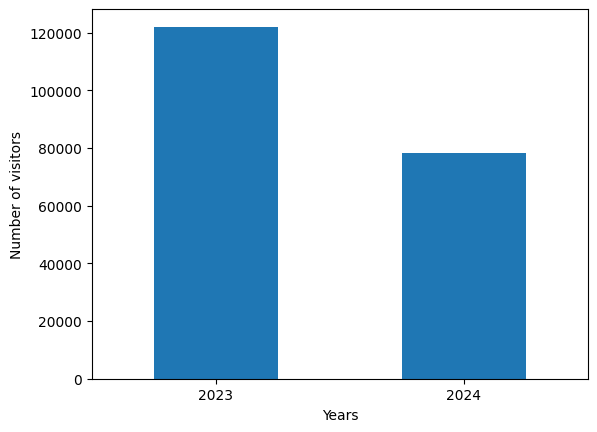

In [267]:
visitors_by_year = train_df.groupby('year')['store_visitors'].sum()

visitors_by_year.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Number of visitors')
plt.xticks(rotation = 0)
plt.show()

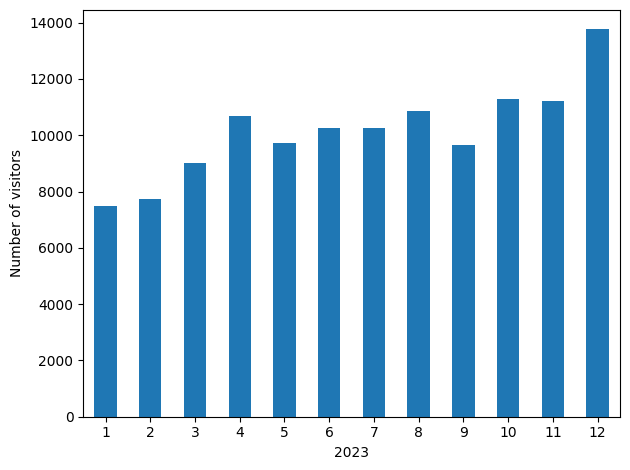

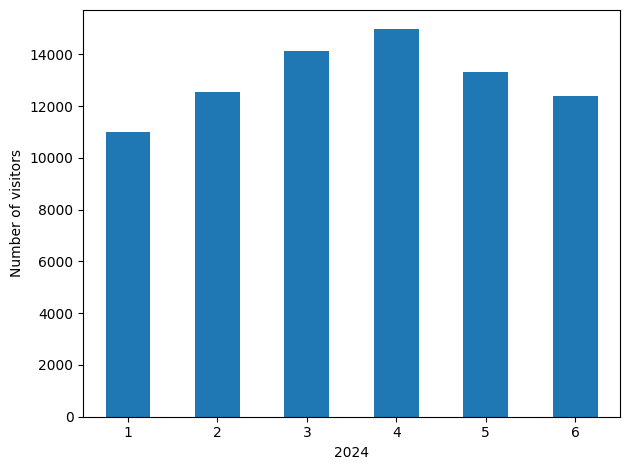

In [268]:
years = train_df["year"].unique()

for year in years:
    visitors_by_month = train_df[train_df["year"] == year].groupby("month")["store_visitors"].sum()

    visitors_by_month.plot(kind='bar')
    plt.xlabel(year)
    plt.ylabel('Number of visitors')
    plt.xticks(rotation=0)  
    plt.tight_layout()  
    plt.show()  

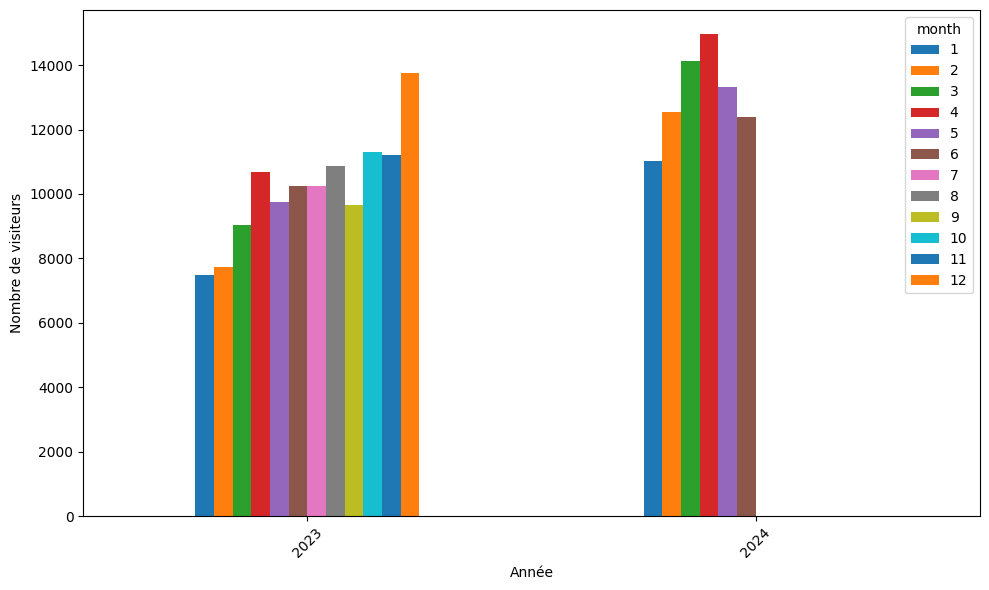

In [269]:
visitors_by_month_year = train_df.groupby(['year', 'month'])['store_visitors'].sum().unstack()

visitors_by_month_year.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Année')
plt.ylabel('Nombre de visiteurs')
plt.xticks(rotation=45)
plt.tight_layout()  # Rotate labels to avoid overlap or cutting
plt.show()

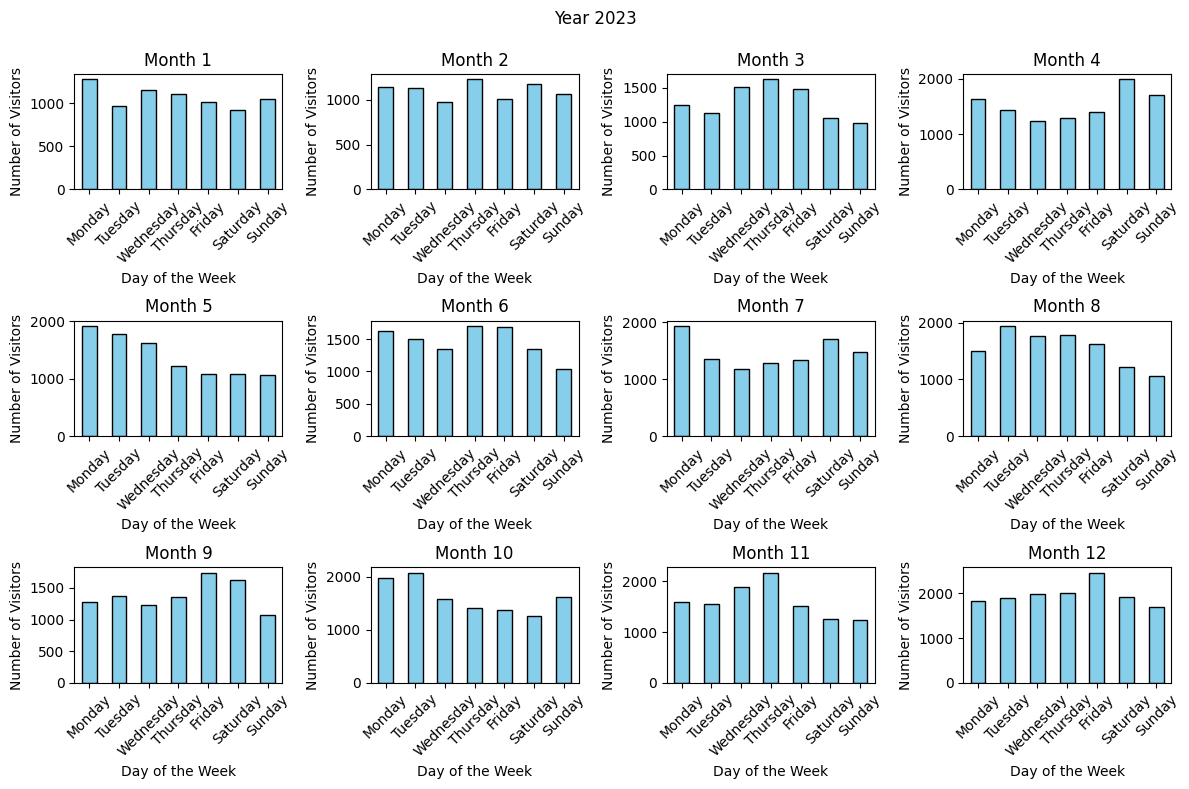

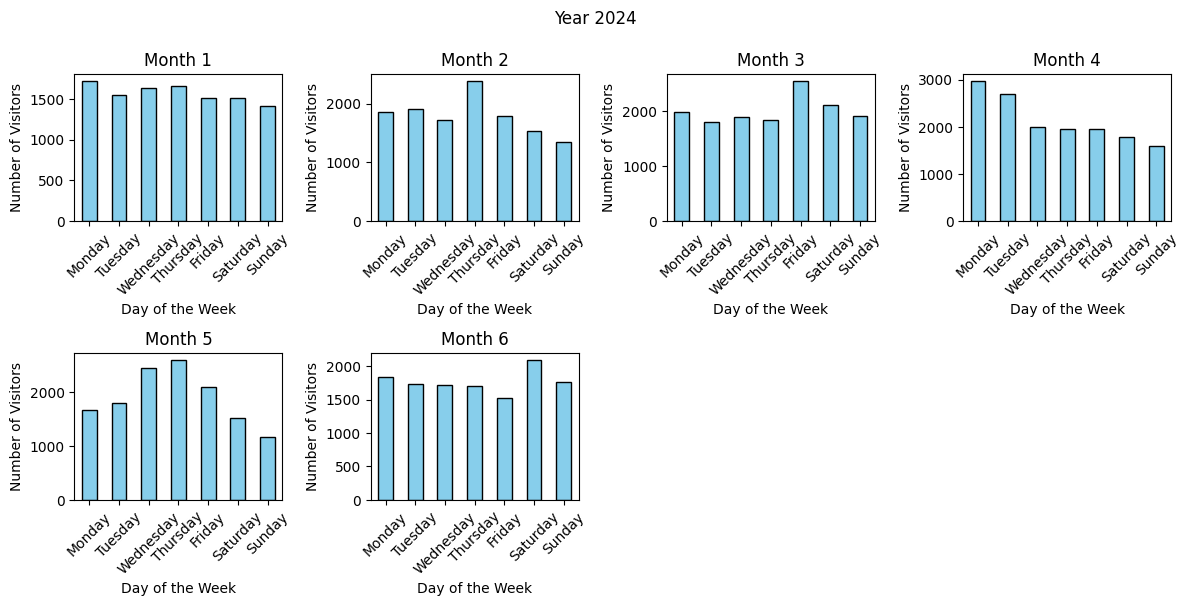

In [270]:
visitors_by_year_month_day = train_df.groupby(['year', 'month', 'day_of_week'])['store_visitors'].sum()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the days of the week to display the names
visitors_by_year_month_day = visitors_by_year_month_day.unstack('day_of_week')
visitors_by_year_month_day.columns = days

years = train_df["year"].unique()  # Get all unique years

for year in years:
    plt.figure(figsize=(12, 8))  # Create a new figure for each year
    for month in range(1, 13):
        # Filter by year and month
        if (year, month) in visitors_by_year_month_day.index:
            monthly_data = visitors_by_year_month_day.loc[(year, month)]  # Filter the data for the given month and year
            ax = plt.subplot(3, 4, month)  # 3 rows, 4 columns for each month
            monthly_data.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
            ax.set_title(f'Month {month}')
            ax.set_xlabel('Day of the Week')
            ax.set_ylabel('Number of Visitors')
            ax.set_xticklabels(days, rotation=45)
    plt.suptitle(f'Year {year}')  # Add a main title for each year
    plt.tight_layout()  # To avoid text cuts
    plt.subplots_adjust(top=0.9)  # Adjust the spacing for the main title
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

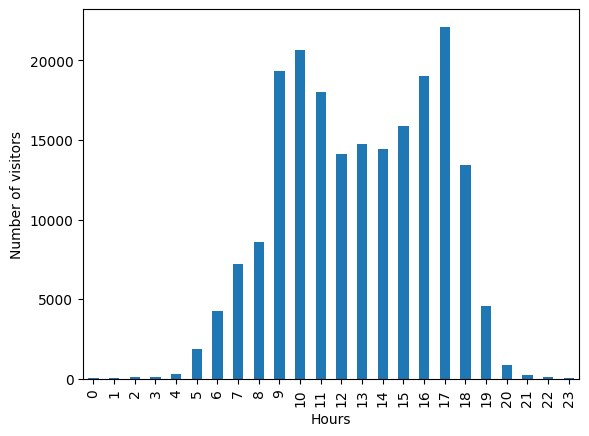

In [271]:
visitors_by_hour = train_df.groupby(['hour'])['store_visitors'].sum()

visitors_by_hour.plot(kind='bar')
plt.xlabel("Hours")
plt.ylabel("Number of visitors")
plt.show

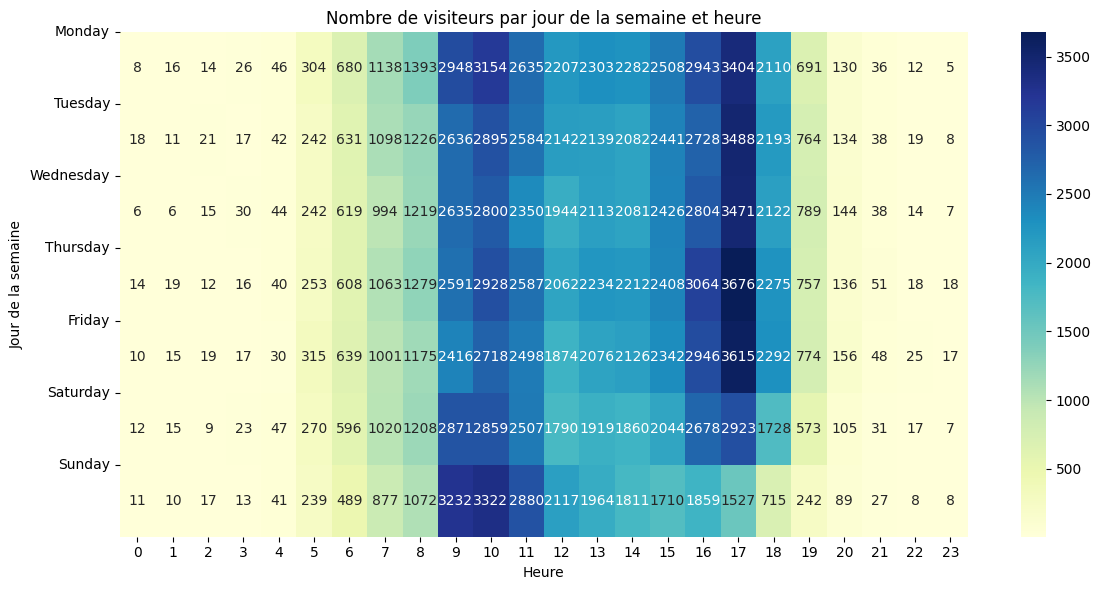

In [272]:
heatmap_data = train_df.groupby(["day_of_week", "hour"])["store_visitors"].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Nombre de visiteurs par jour de la semaine et heure")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.yticks(ticks=range(7), labels=days, rotation=0)
plt.tight_layout()
plt.show()

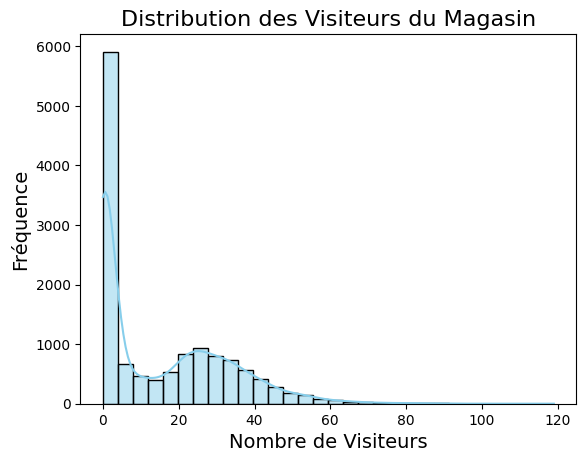

In [273]:
sns.histplot(train_df['store_visitors'], kde=True, bins=30, color='skyblue')
plt.title('Distribution des Visiteurs du Magasin', fontsize=16)
plt.xlabel('Nombre de Visiteurs', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.show()

Cleaning dataset

In [274]:
print("Nombre de doublons (True) : ", train_df.duplicated().sum())

Nombre de doublons (True) :  0


In [275]:
#It won't be useful in the model training
train_df = train_df.drop(columns=['id'])
test_df = test_df.drop(columns=['id'])

In [276]:
negative_values = train_df[train_df['store_visitors'] < 0]
print(negative_values)

Empty DataFrame
Columns: [date, store_visitors, year, month, day_of_week, hour]
Index: []


Text(0.5, 0, 'Nombre de Visiteurs')

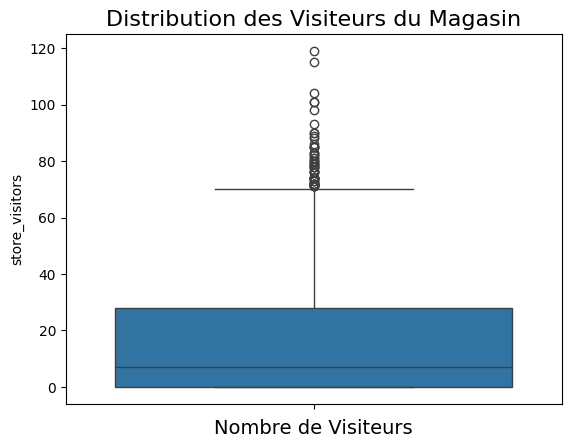

In [277]:
#Outliers
sns.boxplot(train_df['store_visitors'])
plt.title('Distribution des Visiteurs du Magasin', fontsize=16)
plt.xlabel('Nombre de Visiteurs', fontsize=14)


In [278]:
# Calculate the quartiles and the IQR
Q1 = train_df['store_visitors'].quantile(0.25)
Q3 = train_df['store_visitors'].quantile(0.75)
IQR = Q3 - Q1
# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the data to remove outliers
train_df = train_df[(train_df['store_visitors'] >= lower_bound) & (train_df['store_visitors'] <= upper_bound)]
print(len(train_df))

13048


Text(0.5, 0, 'Nombre de Visiteurs')

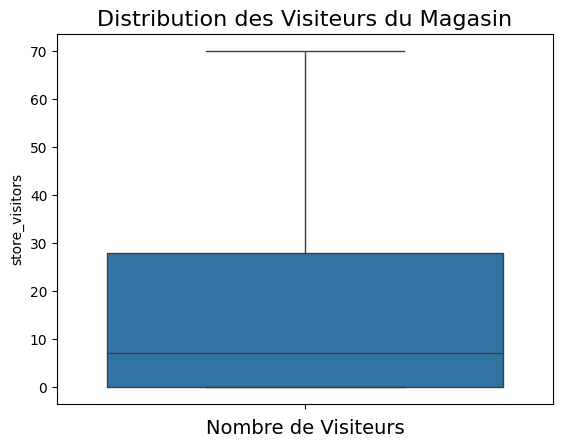

In [279]:
#deleted outliers
sns.boxplot(train_df['store_visitors'])
plt.title('Distribution des Visiteurs du Magasin', fontsize=16)
plt.xlabel('Nombre de Visiteurs', fontsize=14)

Normalisation

In [280]:
columns_to_standarize = ['year', 'month', 'day_of_week', 'hour']
scaler = StandardScaler()
train_df[columns_to_standarize] = scaler.fit_transform(train_df[columns_to_standarize])
test_df[columns_to_standarize] = scaler.fit_transform(test_df[columns_to_standarize])
print(train_df.head(2))

                 date  store_visitors      year     month  day_of_week  \
0 2023-01-01 05:00:00               1 -0.703655 -1.365789     1.496077   
1 2023-01-01 06:00:00               1 -0.703655 -1.365789     1.496077   

       hour  
0 -0.938294  
1 -0.793923  


Apply event flags to train_df

In [281]:
def flag_event_days(df, event_df):
    df['is_event_day'] = df['date'].dt.date.isin(event_df['flag_day_1'].dt.date) | df['date'].dt.date.isin(event_df['flag_day_2'].dt.date)
    return df

In [282]:
train_df = flag_event_days(train_df, event_df)
test_df = flag_event_days(test_df, event_df)

In [283]:
train_df['is_event_day'] = train_df['is_event_day'].astype(int)
test_df['is_event_day'] = test_df['is_event_day'].astype(int)

In [284]:
print(train_df)
print(test_df)


                     date  store_visitors      year     month  day_of_week  \
0     2023-01-01 05:00:00               1 -0.703655 -1.365789     1.496077   
1     2023-01-01 06:00:00               1 -0.703655 -1.365789     1.496077   
2     2023-01-01 07:00:00               0 -0.703655 -1.365789     1.496077   
3     2023-01-01 08:00:00               2 -0.703655 -1.365789     1.496077   
4     2023-01-01 09:00:00              21 -0.703655 -1.365789     1.496077   
...                   ...             ...       ...       ...          ...   
13102 2024-06-30 16:00:00              35  1.421151  0.144936     1.496077   
13103 2024-06-30 17:00:00              20  1.421151  0.144936     1.496077   
13104 2024-06-30 18:00:00               8  1.421151  0.144936     1.496077   
13105 2024-06-30 19:00:00               3  1.421151  0.144936     1.496077   
13106 2024-06-30 20:00:00               0  1.421151  0.144936     1.496077   

           hour  is_event_day  
0     -0.938294             1  

Training model

In [285]:
train_df

,date,store_visitors,year,month,day_of_week,hour,is_event_day
0,2023-01-01 05:00:00,1,-0.703655,-1.365789,1.496077,-0.938294,1
1,2023-01-01 06:00:00,1,-0.703655,-1.365789,1.496077,-0.793923,1
2,2023-01-01 07:00:00,0,-0.703655,-1.365789,1.496077,-0.649551,1
3,2023-01-01 08:00:00,2,-0.703655,-1.365789,1.496077,-0.505179,1
4,2023-01-01 09:00:00,21,-0.703655,-1.365789,1.496077,-0.360808,1
...,...,...,...,...,...,...,...
13102,2024-06-30 16:00:00,35,1.421151,0.144936,1.496077,0.649794,0
13103,2024-06-30 17:00:00,20,1.421151,0.144936,1.496077,0.794166,0
13104,2024-06-30 18:00:00,8,1.421151,0.144936,1.496077,0.938538,0
13105,2024-06-30 19:00:00,3,1.421151,0.144936,1.496077,1.082909,0


In [286]:
test_df

,date,store_visitors,year,month,day_of_week,hour,is_event_day
0,2024-07-01 05:00:00,0,0.0,-0.998646,-1.495576,-0.950150,0
1,2024-07-01 06:00:00,0,0.0,-0.998646,-1.495576,-0.805077,0
2,2024-07-01 07:00:00,0,0.0,-0.998646,-1.495576,-0.660004,0
3,2024-07-01 08:00:00,0,0.0,-0.998646,-1.495576,-0.514931,0
4,2024-07-01 09:00:00,0,0.0,-0.998646,-1.495576,-0.369858,0
...,...,...,...,...,...,...,...
1471,2024-08-31 17:00:00,0,0.0,1.001356,1.031868,0.790727,0
1472,2024-08-31 18:00:00,0,0.0,1.001356,1.031868,0.935800,0
1473,2024-08-31 19:00:00,0,0.0,1.001356,1.031868,1.080873,0
1474,2024-08-31 20:00:00,0,0.0,1.001356,1.031868,1.225947,0


In [287]:
X = train_df.drop(columns=['store_visitors', 'date'])
y = train_df['store_visitors']
# Split the data into training and testing sets 20% 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
rf = RandomForestRegressor(
    n_estimators=100,        # Number of trees in the forest
    criterion='squared_error',  # Quality criterion for the split
    max_depth=None,           # Maximum depth of the trees
    min_samples_split=5,      # Minimum number of samples required to split an internal node
    min_samples_leaf=4,       # Minimum number of samples required to be at a leaf node
    max_features='sqrt',      # Number of features to consider when looking for the best split
    random_state=42           # For reproducibility
)
# Training the model
rf.fit(X_train, y_train);

In [289]:
# Predictions on the training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculating metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
# Calculating metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Summary of metrics
metrics = {
    'Metric': ['R²', 'MSE', 'RMSE'],
    'Training': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

  Metric   Training       Test
0     R²   0.883587   0.838281
1    MSE  31.838010  44.160071
2   RMSE   5.642518   6.645304


In [290]:
X_test = test_df.drop(columns=['store_visitors', 'date'])
y_test = test_df['store_visitors']

In [291]:
# Prédictions sur l'ensemble de test
y_test_pred = rf.predict(X_test)

In [292]:
test_df['Predicted_Store_Visitors'] = y_test_pred
print(test_df[['date', 'Predicted_Store_Visitors']].head())

                 date  Predicted_Store_Visitors
0 2024-07-01 05:00:00                  1.338496
1 2024-07-01 06:00:00                  2.160055
2 2024-07-01 07:00:00                  4.112169
3 2024-07-01 08:00:00                  5.166601
4 2024-07-01 09:00:00                 30.117773
